### Naive Bayes Algorithm

Problem Statement

Dataset: Heart_Disease.csv
This dataset contains information about diagnoses of heart disease patients.Predict the heart disease using classification model based on attributes such as blood pressure, cholestoral levels, heart rate, and other characteristic attributes.

**Machine learning model is needed in order to determine whether a person has heart disease or not, for this use Naive_Byes algorithm.**


In [1]:
# import the libaries
import pandas as pd

In [3]:
hearth_ds = pd.read_csv (r"E:\Sankhyana Training\Datasets\Naive_Bayes_Heart_Disease.csv")
hearth_ds.head()

,age,sex,Chest_Pain,Blood_Pressure(mm Hg),cholestoral (mg/dl),Fasting_Blood_Sugar,resting electrocardiographic,Maximum_Heart_Rate,Excersize_Includes,ST Depression,Slope_of_Excersize,Number_of_vessels,Thalassemia,Diagnosis_of_Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
hearth_ds.shape

(303, 14)

In [7]:
hearth_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
Chest_Pain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
Blood_Pressure(mm Hg),303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestoral (mg/dl),303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
Fasting_Blood_Sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
resting electrocardiographic,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
Maximum_Heart_Rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
Excersize_Includes,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
ST Depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
hearth_ds.isnull().sum()

age                             0
sex                             0
Chest_Pain                      0
Blood_Pressure(mm Hg)           0
cholestoral (mg/dl)             0
Fasting_Blood_Sugar             0
resting electrocardiographic    0
Maximum_Heart_Rate              0
Excersize_Includes              0
ST Depression                   0
Slope_of_Excersize              0
Number_of_vessels               0
Thalassemia                     0
Diagnosis_of_Heart_Disease      0
dtype: int64

In [9]:
hearth_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           303 non-null    int64  
 1   sex                           303 non-null    int64  
 2   Chest_Pain                    303 non-null    int64  
 3   Blood_Pressure(mm Hg)         303 non-null    int64  
 4   cholestoral (mg/dl)           303 non-null    int64  
 5   Fasting_Blood_Sugar           303 non-null    int64  
 6   resting electrocardiographic  303 non-null    int64  
 7   Maximum_Heart_Rate            303 non-null    int64  
 8   Excersize_Includes            303 non-null    int64  
 9   ST Depression                 303 non-null    float64
 10  Slope_of_Excersize            303 non-null    int64  
 11  Number_of_vessels             303 non-null    int64  
 12  Thalassemia                   303 non-null    int64  
 13  Diagn

In [10]:
hearth_ds.head(2)

,age,sex,Chest_Pain,Blood_Pressure(mm Hg),cholestoral (mg/dl),Fasting_Blood_Sugar,resting electrocardiographic,Maximum_Heart_Rate,Excersize_Includes,ST Depression,Slope_of_Excersize,Number_of_vessels,Thalassemia,Diagnosis_of_Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [11]:
hearth_ds.columns

Index(['age', 'sex', 'Chest_Pain', 'Blood_Pressure(mm Hg)',
       'cholestoral (mg/dl)', 'Fasting_Blood_Sugar',
       'resting electrocardiographic', 'Maximum_Heart_Rate',
       'Excersize_Includes', 'ST Depression', 'Slope_of_Excersize',
       'Number_of_vessels', 'Thalassemia', 'Diagnosis_of_Heart_Disease'],
      dtype='object')

In [14]:
# rename the columns
hearth_ds1 = hearth_ds.rename(columns = {"Blood_Pressure(mm Hg)":"Blood_Pressure","cholestoral (mg/dl)": "cholestoral",
                                         "resting electrocardiographic":"resting_electrocardiographic", "ST Depression":"ST_Depression" })

In [15]:
hearth_ds1.head()

,age,sex,Chest_Pain,Blood_Pressure,cholestoral,Fasting_Blood_Sugar,resting_electrocardiographic,Maximum_Heart_Rate,Excersize_Includes,ST_Depression,Slope_of_Excersize,Number_of_vessels,Thalassemia,Diagnosis_of_Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Visualization

In [16]:
# 1 represents male
# 0 represents female

hearth_ds1.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [18]:
# 1 represnts has hearth disease
# 0 represents does not have hearth disease

hearth_ds1.Diagnosis_of_Heart_Disease.value_counts()

Diagnosis_of_Heart_Disease
1    165
0    138
Name: count, dtype: int64

In [19]:
pd.crosstab (hearth_ds1.sex, hearth_ds1.Diagnosis_of_Heart_Disease)

Diagnosis_of_Heart_Disease,0,1
sex,,
0,24,72
1,114,93


<Axes: xlabel='sex'>

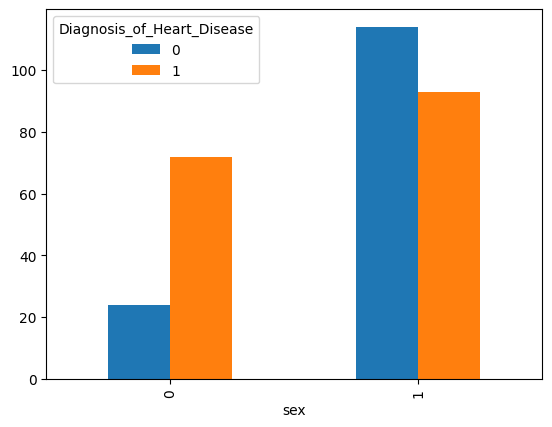

In [20]:
pd.crosstab (hearth_ds1.sex, hearth_ds1.Diagnosis_of_Heart_Disease).plot(kind = "bar")

In [21]:
# scatterplot to visualize relationship between different features
hearth_ds1.head(2)

,age,sex,Chest_Pain,Blood_Pressure,cholestoral,Fasting_Blood_Sugar,resting_electrocardiographic,Maximum_Heart_Rate,Excersize_Includes,ST_Depression,Slope_of_Excersize,Number_of_vessels,Thalassemia,Diagnosis_of_Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


<Axes: xlabel='age', ylabel='Blood_Pressure'>

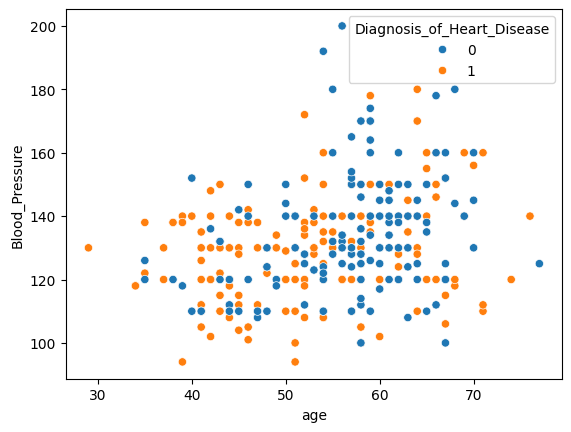

In [23]:
import seaborn as sns
sns.scatterplot(x= 'age', y ='Blood_Pressure', data = hearth_ds1, hue= 'Diagnosis_of_Heart_Disease' )

#### Features Selection

In [24]:
# input featuures
data = hearth_ds1.iloc[:, :13 ]

# target feature
targer = hearth_ds1.iloc[:, 13]

In [25]:
data.head(1)

,age,sex,Chest_Pain,Blood_Pressure,cholestoral,Fasting_Blood_Sugar,resting_electrocardiographic,Maximum_Heart_Rate,Excersize_Includes,ST_Depression,Slope_of_Excersize,Number_of_vessels,Thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1


In [26]:
## splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split (data, targer, train_size= 0.8)

In [27]:
X_train.shape

(242, 13)

##### Model Training

In [29]:
# importing the algorithm
from sklearn.naive_bayes import BernoulliNB

In [31]:
hd_model  = BernoulliNB()
hd_model

BernoulliNB()

In [32]:
hd_model.fit(X_train, Y_train)

BernoulliNB()

In [37]:
# checking the model accuracy
from sklearn.metrics import accuracy_score
x_train_predict = hd_model.predict(X_test)

In [38]:
accuracy_score(x_train_predict, Y_test)

0.7704918032786885

In [39]:
# saving the model

import pickle 

In [40]:
# defining the model name
filename = "heard_diseas_model.pkl"
pickle.dump(hd_model, open(filename, 'wb'))

In [42]:
import os
os.getcwd()

'C:\\Users\\Alvine\\Desktop'